<a href="https://colab.research.google.com/github/Brandon-lz/master/blob/main/aicodes/08%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E4%B8%8E%E5%85%A8%E8%BF%9E%E6%8E%A5%E5%B1%82/%E8%AF%AF%E5%B7%AE%E8%AE%A1%E7%AE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

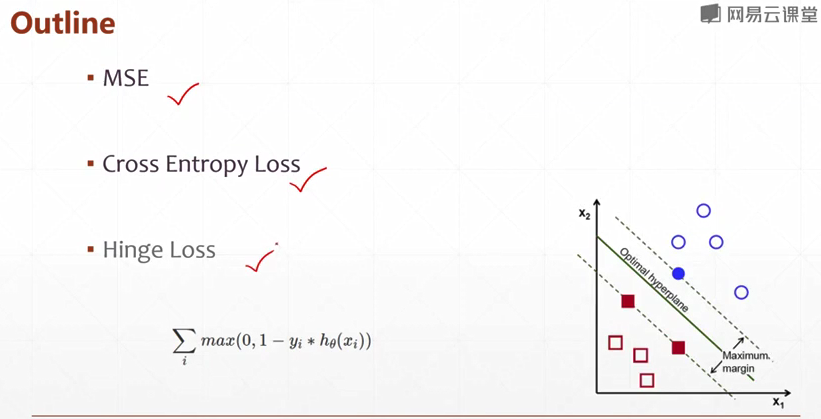

1、求MSE

In [ ]:
y = tf.constant([1,2,3,0,2])
y = tf.one_hot(y,depth=4)
y = tf.cast(y,dtype=tf.float32)
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

In [ ]:
out = tf.random.normal([5,4])

In [ ]:
loss1 = tf.reduce_mean(tf.square(y-out))      #MSE,平方和求平均
loss2 = tf.square(tf.norm(y-out))/(5*4)      #与上面相同
loss3 = tf.reduce_mean(tf.losses.MSE(y,out))   #相同

In [ ]:
loss1,loss2,loss3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.112226>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.112226>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.112226>)

### 交叉熵Entropy，熵越小就越不确定，信息量越大
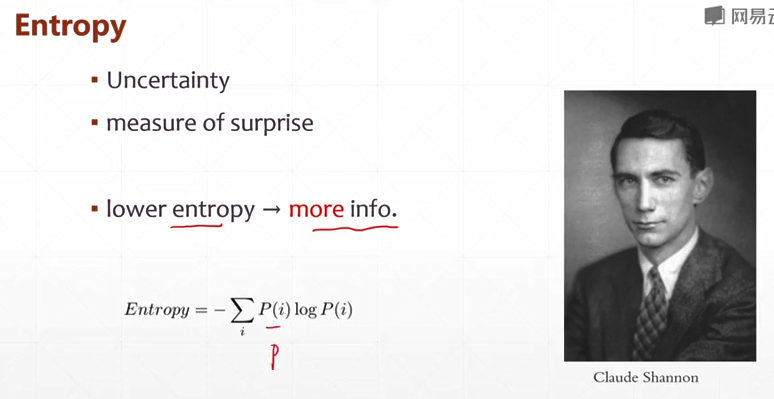

Lottery 惊喜度

In [ ]:
a = tf.fill([4],0.25)

In [ ]:
a*tf.math.log(a)/tf.math.log(2.)       #tensorflow中log默认以e为底，这里将其换为2为底

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.5, -0.5, -0.5, -0.5], dtype=float32)>

In [ ]:
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))     #熵   2算是比较大的，所以信息量比较小，惊喜度低

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
a = tf.constant([0.1,0.1,0.1,0.7])
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))    #这里的熵为1.356，稍微小了一点，信息量变大，惊喜度变高了

<tf.Tensor: shape=(), dtype=float32, numpy=1.3567797>

In [ ]:
a = tf.constant([0.01,0.01,0.01,0.97])        #这种相比上面的例子是最不稳定的，惊喜度最高，熵是最小的
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))

<tf.Tensor: shape=(), dtype=float32, numpy=0.24194068>

Cross Entropy  交叉熵：P的熵+P、Q的距离

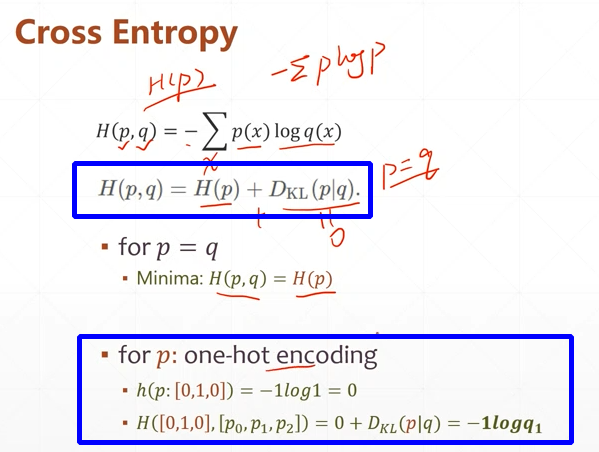

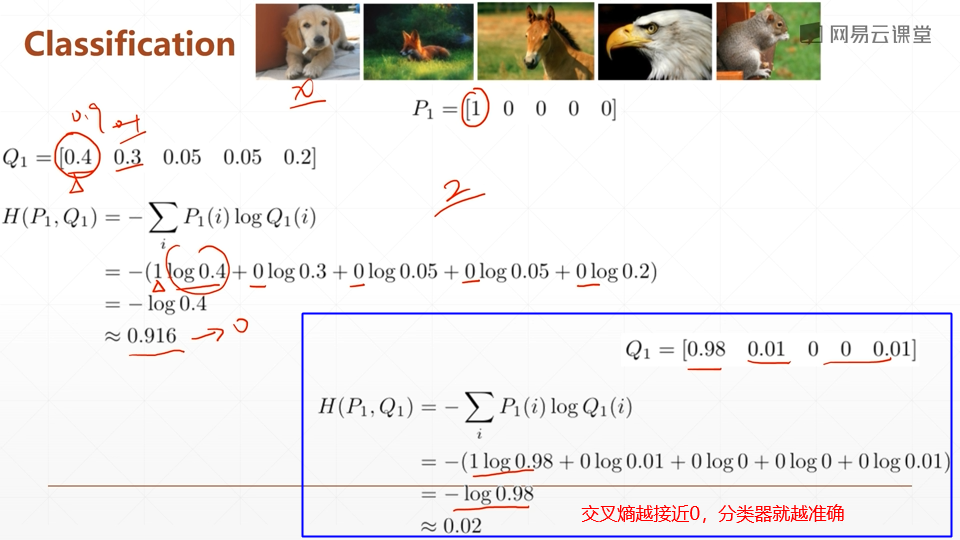

tensorflow中自带的交叉熵的计算接口

In [ ]:
tf.losses.categorical_crossentropy([0,1,0,0],[0.25,0.25,0.25,0.25])    #这种预测结果不是很理想

<tf.Tensor: shape=(), dtype=float32, numpy=1.3862944>

In [ ]:
tf.losses.categorical_crossentropy([0,1,0,0],[0.1,0.7,0.1,0.1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.35667497>

二分类问题，但输出结果为一个节点的情况下，用交叉熵计算loss的方法

In [ ]:
tf.losses.binary_crossentropy([1],[0.7])

<tf.Tensor: shape=(), dtype=float32, numpy=0.3566748>

我们可以将logits→交叉熵的过程封装到一个函数中实现

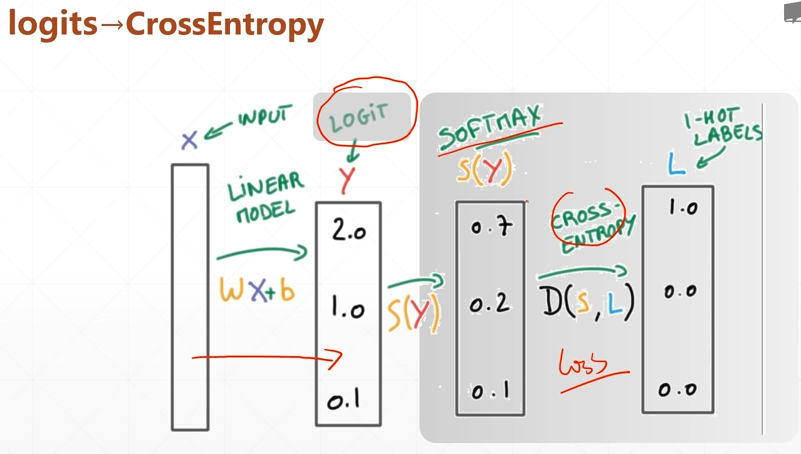

但是计算loss的时候，很多时候会出现数值不稳定的情况，tensorflow为我们提供了稳定的处理方法

In [ ]:
x = tf.random.normal([1,784])
w = tf.random.normal([784,2])
b = tf.zeros([2])

In [ ]:
logits = x@w + b
logits

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.87367296, 40.661964  ]], dtype=float32)>

In [ ]:
prob = tf.math.softmax(logits,axis=1)
prob

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[9.147493e-19, 1.000000e+00]], dtype=float32)>

In [ ]:
#不推荐用这种方法，用softmax处理过后，有数值不稳定的情况
tf.losses.categorical_crossentropy([0,1],prob[0])

<tf.Tensor: shape=(), dtype=float32, numpy=1.1920929e-07>

In [ ]:
#推荐用这种方法，从logits直接得到loss
tf.losses.categorical_crossentropy([0,1],logits[0],from_logits=True)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>